In [35]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [36]:
columns_nm = ['Id','Entry','target','text']

In [37]:
df = pd.read_csv(r'C:\PersonalFiles\Computer_Science\archive\twitter_training.csv', encoding = 'unicode_escape',names=columns_nm)

In [38]:
df.head()

,Id,Entry,target,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [39]:
df.loc[100,'text']

'Deep Grounded almost looked pretty cool even despite the borderlands fifth tier unfunny writing format until ultimately it became yet another survival crafting mobile game. I really can â\x80\x99 t wait for this shitty trend starting to... die'

In [40]:
df['target'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [41]:
df['Entry'].unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [42]:
df['target'].value_counts(ascending=True)

target
Irrelevant    12990
Neutral       18318
Positive      20832
Negative      22542
Name: count, dtype: int64

In [43]:
colors =('#808080','#FFA500','#FFA500','#FF00FF')

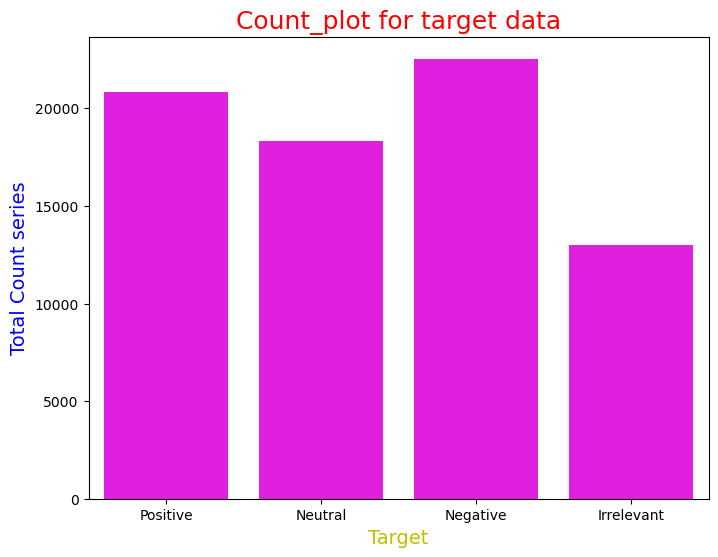

In [44]:
plt.figure(figsize=(8,6))
sns.countplot(x='target', data=df, color='#FF00FF')
plt.title("Count_plot for target data", fontsize=18, c='r')
plt.ylabel("Total Count series", fontsize=14, c='b')
plt.xlabel("Target", fontsize=14, c='y')
plt.show()


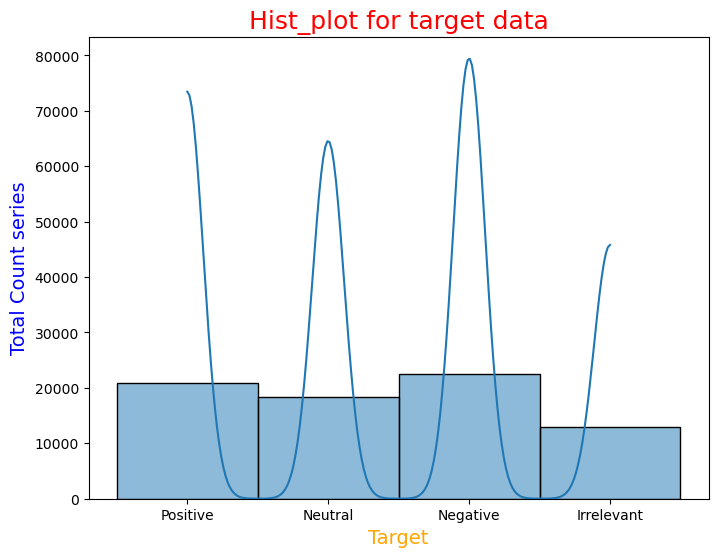

In [45]:
plt.figure(figsize=(8,6))
sns.histplot(x='target', data=df,  kde= True)
plt.title("Hist_plot for target data", fontsize=18, c='r')
plt.ylabel("Total Count series", fontsize=14, c='b')
plt.xlabel("Target", fontsize=14, c='#FFA500')
plt.show()


In [46]:
b=df['Entry'].value_counts()

In [47]:
b

Entry
TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)         

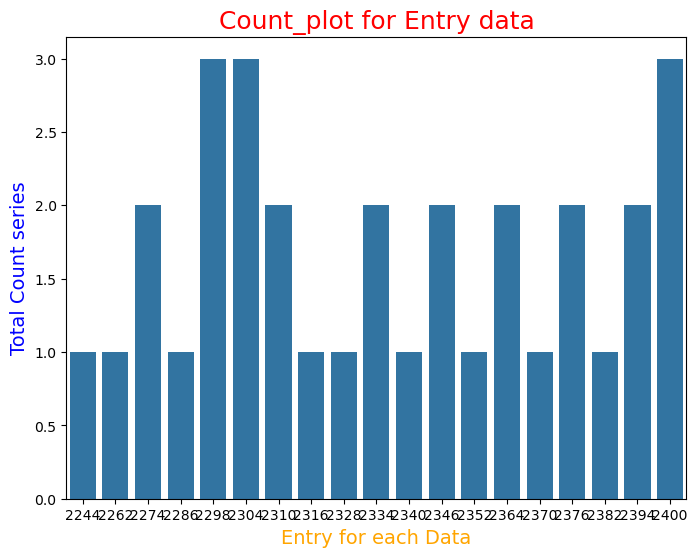

In [48]:
plt.figure(figsize=(8,6))
sns.countplot(x=b, data=df)
plt.title("Count_plot for Entry data", fontsize=18, c='r')
plt.ylabel("Total Count series", fontsize=14, c='b')
plt.xlabel("Entry for each Data", fontsize=14, c='#FFA500')
plt.show()

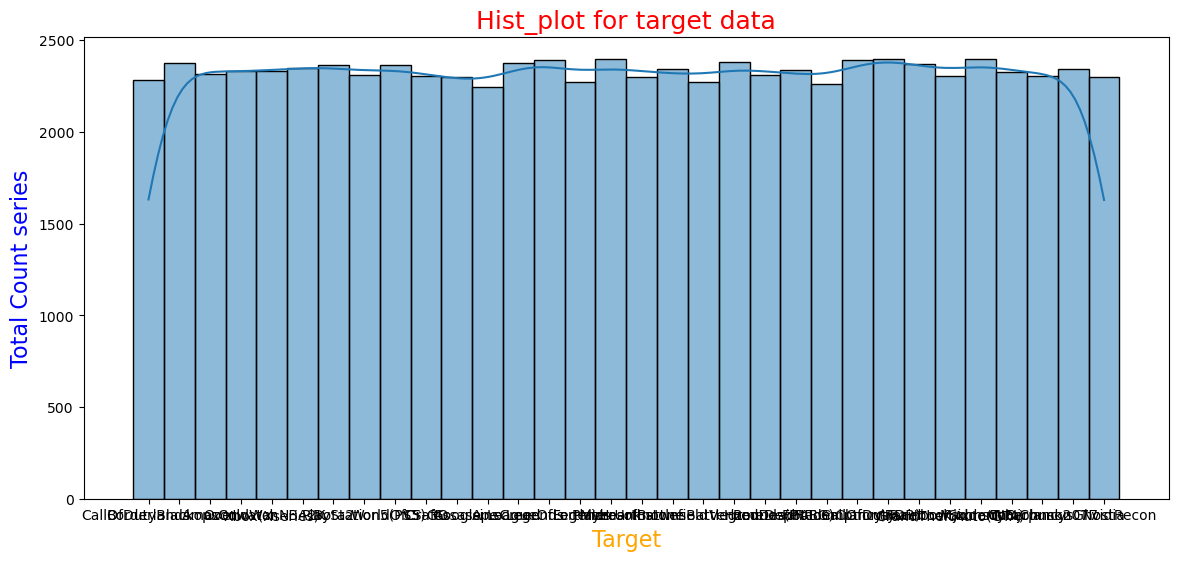

In [49]:
plt.figure(figsize=(14,6))
sns.histplot(x='Entry', data=df,  kde= True)
plt.title("Hist_plot for target data", fontsize=18, c='r')
plt.ylabel("Total Count series", fontsize=16, c='b')
plt.xlabel("Target", fontsize=16, c='#FFA500')
plt.show()

<Figure size 1400x1200 with 0 Axes>

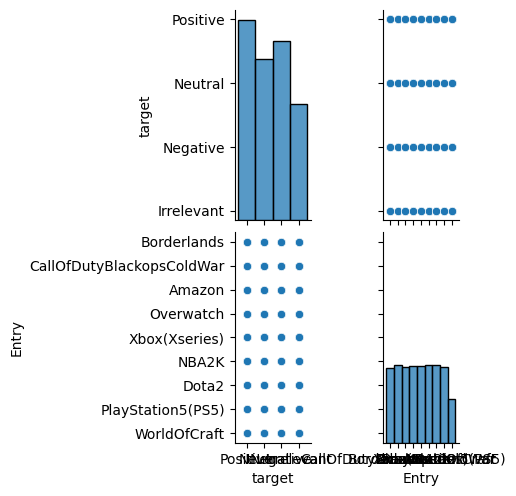

In [50]:
plt.figure(figsize = (14 , 12))
sns.pairplot(df[10:20000] , vars = ["target" , "Entry"] )
plt.show()

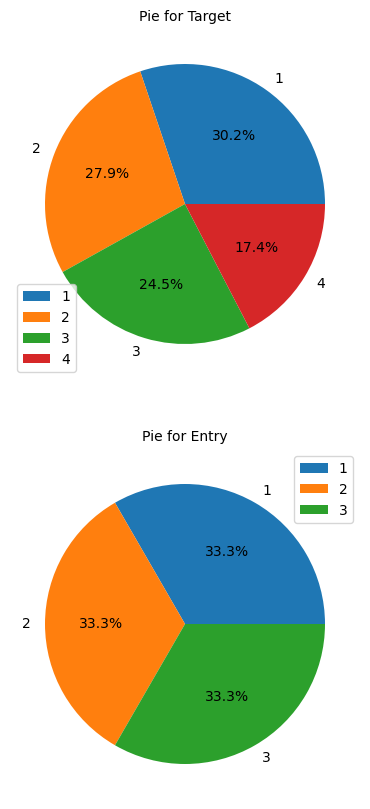

In [51]:
## Pie for Target and Entry columns

plt.figure(figsize = (10 , 10))
t = df["target"].value_counts()
labels = ["1" , "2" , "3" , "4"]
plt.subplot(2,1,1)
plt.pie(t , labels = labels , autopct = "%1.1f%%")
plt.legend()
plt.title("Pie for Target" , fontsize = 10 , c = "k")


ent = df["Entry"].value_counts().head(3)
labels = ["1" , "2" , "3"]
plt.subplot(2,1,2)
plt.pie(ent , labels = labels , autopct = "%1.1f%%")
plt.legend()
plt.title("Pie for Entry" , fontsize = 10 , c = "k")

plt.show()

In [52]:
df.duplicated().sum()

2700

# Data processing for model creation

In [53]:
df.head()

,Id,Entry,target,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [54]:
df.isnull().sum() # Null value finds

Id          0
Entry       0
target      0
text      686
dtype: int64

In [55]:
df['text'].fillna('unknown', inplace=True)
df["text"].replace("" , inplace = True)

In [56]:
df.isnull().sum()

Id        0
Entry     0
target    0
text      0
dtype: int64

In [57]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [58]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from nltk.stem import PorterStemmer , WordNetLemmatizer

In [59]:
nltk.download("stopwords")
nltk.download("words")
nltk.download("punkt")
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\Nik
[nltk_data]     Computer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to C:\Users\Nik
[nltk_data]     Computer\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Nik
[nltk_data]     Computer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Nik
[nltk_data]     Computer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [60]:
sample_text="My name is Shayan! I have 1 brother.@@@@"

sample_lower=sample_text.lower()
print("sample_lower :", sample_lower)

sample_sub1=re.sub(r"[^\w\s]", "", sample_lower)
print("sample_sub1 :", sample_sub1)

sample_tokens = word_tokenize(sample_sub1)
print("sample_tokens :", sample_tokens)

sample_lower : my name is shayan! i have 1 brother.@@@@
sample_sub1 : my name is shayan i have 1 brother
sample_tokens : ['my', 'name', 'is', 'shayan', 'i', 'have', '1', 'brother']


In [61]:
def processword(text):
    # smaller convert
    text = text.lower()

    # remove puntuations
    text = re.sub(r"[^\w\s]", "", text)

    # remove numbers
    text = re.sub(r"\d+", "", text)

    #split text into tokens
    tokens = word_tokenize(text)

    #remove stopwords
   # stop_wprds = set(stopwords.words("English"))
    #tokens = [word for word in tokens if word not in stop_wprds]

    # Stemmer
#     stemmer = PorterStemmer()
#     stemmer_token = [stemmer.stem(token) for token in tokens]

#     ## Lemmatizer
#     lematizer = WordNetLemmatizer()
#     lemmatize_token = [lematizer.lemmatize(token) for token in stemmer_token]

    return " ".join(tokens)

In [62]:
df['process_text'] = df['text'].apply(processword)

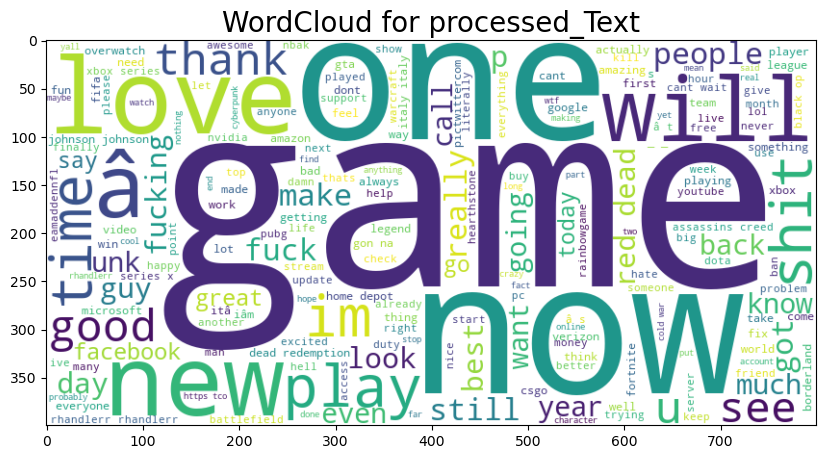

In [63]:
## wordcloud
all_text = " ".join(df["process_text"].astype(str))
wordcloud = WordCloud(height = 400 , width = 800 , background_color = "white").generate(all_text)
plt.figure(figsize = (10,5))
plt.title("WordCloud for processed_Text" , fontsize = 20 , c = "k")
plt.imshow(wordcloud , interpolation = "bilinear")
plt.show()

# create bags of wrods representation using CountVectorizer

In [65]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer(max_features=1000)
feature = v.fit_transform(df['process_text'])

In [66]:
feature

<74682x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 849451 stored elements in Compressed Sparse Row format>

In [67]:
feature_cv = feature.toarray()
feature_cv.shape

(74682, 1000)

In [68]:
feature_cv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [69]:
feature_cv.shape

(74682, 1000)

In [70]:
x = feature_cv[:30000]
y = df.target[:30000]

# train test split

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(x,y, random_state=32, test_size=0.25)

In [72]:
X_train.shape

(22500, 1000)

In [73]:
X_test.shape

(7500, 1000)

In [74]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Build model using Naive Bayesian classifier

In [75]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [76]:
nb.score(X_test,y_test)

0.5817333333333333

In [77]:
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)
print(f"Report : \n{classification_report(y_test,y_pred)}")

Report : 
              precision    recall  f1-score   support

  Irrelevant       0.46      0.34      0.39      1282
    Negative       0.62      0.65      0.64      1921
     Neutral       0.60      0.48      0.53      1878
    Positive       0.58      0.73      0.65      2419

    accuracy                           0.58      7500
   macro avg       0.57      0.55      0.55      7500
weighted avg       0.58      0.58      0.57      7500



# Confussion metrics

In [78]:
from sklearn.metrics import confusion_matrix

In [79]:
confu_matrix = confusion_matrix(y_test,y_pred)
print(f"Confussion matrix : \n {confu_matrix}")

Confussion matrix : 
 [[ 436  228  197  421]
 [ 145 1254  156  366]
 [ 201  301  900  476]
 [ 170  238  238 1773]]


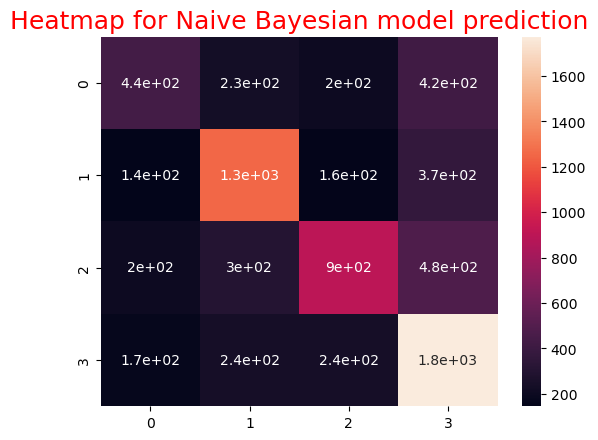

In [80]:
sns.heatmap(confu_matrix, annot=True)
plt.title("Heatmap for Naive Bayesian model prediction", c ='r',  fontsize=18)
plt.show()

# Build model using RandomForest Classifier

In [81]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [82]:
model.score(X_test,y_test)

0.8726666666666667

In [83]:
y_pdict = model.predict(X_test)
rn_report = classification_report(y_test,y_pdict)
print(f"Report : \n{rn_report}")

Report : 
              precision    recall  f1-score   support

  Irrelevant       0.92      0.78      0.84      1282
    Negative       0.90      0.89      0.90      1921
     Neutral       0.82      0.89      0.85      1878
    Positive       0.87      0.90      0.89      2419

    accuracy                           0.87      7500
   macro avg       0.88      0.86      0.87      7500
weighted avg       0.88      0.87      0.87      7500



In [84]:
confu_matrix = confusion_matrix(y_test,y_pdict)
print(f"Confussion matrix : \n {confu_matrix}")

Confussion matrix : 
 [[ 995   55  121  111]
 [  16 1715  100   90]
 [  35   66 1667  110]
 [  34   72  145 2168]]


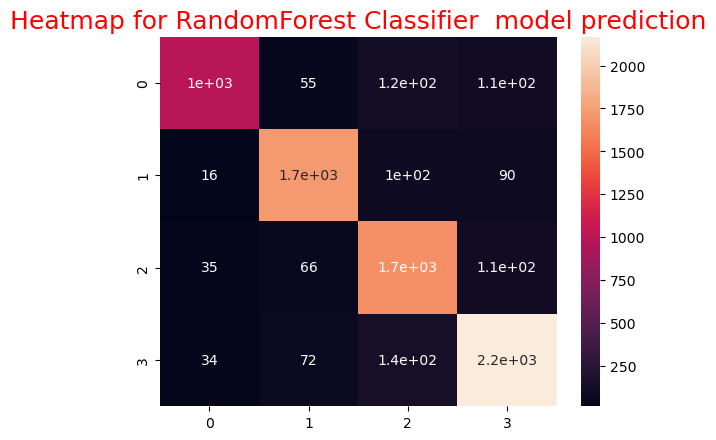

In [85]:
sns.heatmap(confu_matrix, annot=True)
plt.title("Heatmap for RandomForest Classifier  model prediction", c ='r', fontsize=18)
plt.show()

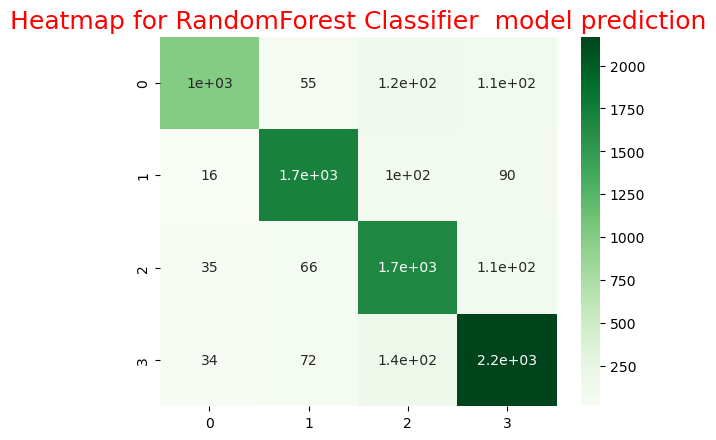

In [86]:
sns.heatmap(confu_matrix, annot=True, cmap='Greens')
plt.title("Heatmap for RandomForest Classifier  model prediction", c ='r', fontsize=18)
plt.show()

# Build model using DecisionTree Classifier

In [87]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [88]:
tree_model.score(X_test,y_test)

0.7601333333333333

In [89]:
y_pred = tree_model.predict(X_test)
tree_report = classification_report(y_test,y_pred)
print(f"DecisionTree Report : \n{tree_report}")

DecisionTree Report : 
              precision    recall  f1-score   support

  Irrelevant       0.71      0.67      0.69      1282
    Negative       0.79      0.78      0.79      1921
     Neutral       0.71      0.78      0.74      1878
    Positive       0.80      0.78      0.79      2419

    accuracy                           0.76      7500
   macro avg       0.75      0.75      0.75      7500
weighted avg       0.76      0.76      0.76      7500



In [90]:
confu_matrix = confusion_matrix(y_test,y_pred)
print(f"confusion_matrix : \n\n {confu_matrix}")

confusion_matrix : 

 [[ 860   95  158  169]
 [ 107 1493  181  140]
 [ 115  145 1462  156]
 [ 137  147  249 1886]]


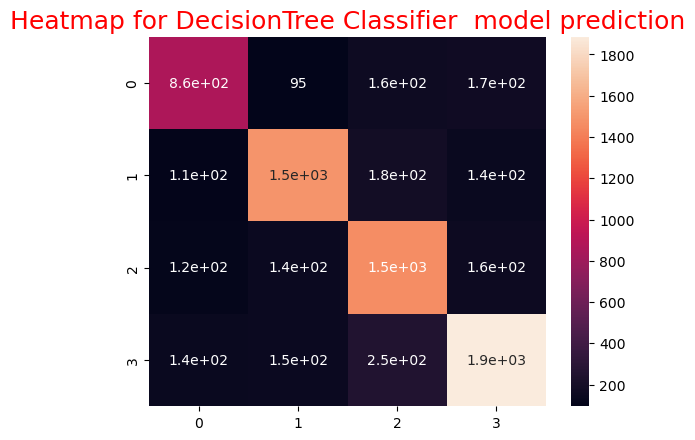

In [91]:
sns.heatmap(confu_matrix, annot=True)
plt.title("Heatmap for DecisionTree Classifier  model prediction", c ='r', fontsize=18)
plt.show()

In [92]:
# prediction using randomForest model

In [93]:
def predict_sentiment(Text):
    processed_Text = processword(Text)

    # Transform the preprocessed text into CountVectorizer vectors
    X_new = v.transform([processed_Text])

    # Make predictions
    predicted_sentiment = model.predict(X_new) # prediction using RandomForest model

    # Print the predicted sentiment
    print("Predicted sentiment:", predicted_sentiment)

In [94]:
predict_sentiment("i love this film")

Predicted sentiment: ['Irrelevant']


In [95]:
predict_sentiment("i hate this film")

Predicted sentiment: ['Negative']


# prediction using Naive bayesian model

In [58]:
def predict_sentiment(Text):
    processed_Text = processword(Text)

    # Transform the preprocessed text into CountVectorizer vectors
    X_new = v.transform([processed_Text])

    # Make predictions
    predicted_sentiment = nb.predict(X_new) # prediction using Naive bayesian model

    # Print the predicted sentiment
    print("Predicted sentiment:", predicted_sentiment)

In [59]:
predict_sentiment("i love this film")

Predicted sentiment: ['Positive']


In [60]:
predict_sentiment("i hate this film")

Predicted sentiment: ['Positive']
